# Produção Energética e Sustentabilidade

### Descrição

A energia solar é uma das principais fontes de energias renováveis, desempenhando não só um papel fundamental na transição para fontes de energia limpa e renovável, mas também na promoção da sustentabilidade ambiental. Nesse contexto, além de ser crucial otimizar o uso da energia solar, a relação entre o gasto e a produção energética é essencial para permitir um planeamento eficaz do consumo energético e a integração harmoniosa de sistemas de energia solar em redes elétricas existentes.

Nesse sentido, a 6ª Edição da Competição ML @SBS/DAA consiste no desenvolvimento de modelos de Machine Learning capazes de prever, com precisão, a quantidade de energia elétrica, em kWh, gerada por painéis solares e injectada na rede eléctrica existente a cada hora do dia com base numa ampla gama de atributos, que vão desde dados meteorológicos e informações geográficas, ao histórico de gasto e produção energética.

Este é, portanto, um problema de previsão de energia com impacto significativo na eficiência energética, mas também na redução das emissões de gases com efeito estufa e na promoção da sustentabilidade. Com isso em consideração, foi colecionado um dataset que contém diversos dados referentes à produção energética de determinados painéis solares na cidade de Braga (o dataset cobre um período que vai desde setembro de 2021 até abril de 2023).

### Objetivo

O objetivo de cada grupo de trabalho passa por desenvolver o melhor modelo possível capaz de prever a quantidade de energia, em kWh, produzida por painéis solares e injectada, em redes elétricas existentes, a cada hora do dia.

O dataset utilizado nesta competição contém um conjunto de features sendo de destacar a feature Injeção na rede (kWh) . Esta feature indica, numa escala qualitativa (None, Low, Medium, High e Very_High), a quantidade de energia que se injectou na rede elétrica num determinado ponto temporal (i.e., numa determinada hora de um determinado dia). Se o valor desta feature for None, significa que não foi injectada nenhuma energia na rede (ou porque nada foi obtido dos painéis solares, ou porque toda a energia produzida pelos painéis foi consumida localmente). Um valor de Very_High implica a existência de uma quantidade muito alta de energia injectada na rede eléctrica naquele ponto temporal.

Para treino e tuning dos modelos de Machine Learning ser-vos-ão disponibilizados dois datasets com dados energéticos e dois datasets com dados meteorológicos. Tantos os datasets energéticos como os meteorológicos estão divididos por data, i.e., um dos datasets cobre o período de 2021 enquanto que o outro cobre todo o ano de 2022. Os grupos de trabalho poderão adicionar aos datasets qualquer atributo que achem relevante.

Para obtenção de scores na competição, os grupos de trabalho deverão prever, para cada registo do dataset de teste ("energia_202301-202304.csv"), a quantidade de energia que se injectou na rede elétrica num determinado ponto temporal, utilizando a escala None, Low, Medium, High e Very_High.

### Os dados

São disponibilizados dois tipos de datasets, i.e., um tipo com dados energéticos e outro tipo com dados meteorológicos. Além disso, cada tipo de dataset está dividido por data, i.e., um dos datasets cobre o período de 2021 enquanto que o outro cobre todo o ano de 2022. Em resumo, são disponibilizados quatro datasets para treino e tuning dos modelos de Machine Learning

Features dos Datasets de Energia

- **Data** - o timestamp associado ao registo, ao dia;
- **Hora** - a hora associada ao registo;
- **Normal (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
- **Horário Económico (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
- **Autoconsumo (kWh)** - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
- **Injeção na rede (kWh)** - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

Features dos Datasets Meteorológicos

- **dt** - o timestamp associado ao registo;
- **dt_iso** - a data associada ao registo, ao segundo;
- **city_name** - o local em causa;
- **temp** - temperatura em ºC;
- **feels_like** - sensação térmica em ºC;
- **temp_min** - temperatura mínima sentida em ºC;
- **temp_max** - temperatura máxima sentida em ºC;
- **pressure** - pressão atmosférica sentida em atm;
- **sea_level** - pressão atmosférica sentida ao nível do mar em atm;
- **grnd_level** - pressão atmosférica sentida à altitude local em atm;
- **humidity** - humidade em percentagem;
- **wind_speed** - velocidade do vento em metros por segundo;
- **rain_1h** - valor médio de precipitação;
- **clouds_all** - nível de nebulosidade em percentagem;
- **weather_description** - avaliação qualitativa do estado do tempo.


## Importar Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outras bibliotecas a importar mais tarde
%matplotlib inline

## Carregar os Datasets

In [3]:
energia2021 = pd.read_csv('datasets/energia_202109-202112.csv', encoding = "ISO-8859-1")
energia2022 = pd.read_csv('datasets/energia_202201-202212.csv', encoding = "ISO-8859-1")
energia2023 = pd.read_csv('datasets/energia_202301-202304.csv', encoding = "ISO-8859-1")

meteo2021 = pd.read_csv('datasets/meteo_202109-202112.csv')
meteo2022 = pd.read_csv('datasets/meteo_202201-202212.csv')
meteo2023 = pd.read_csv('datasets/meteo_202301-202304.csv')

Verificar as colunas de cada dataset

In [4]:
print(energia2021.columns)
print(energia2022.columns)
print(energia2023.columns)
print(meteo2021.columns)
print(meteo2022.columns)
print(meteo2023.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidi

In [5]:
print(energia2021.info())
print()
print(energia2022.info())
print()
print(energia2023.info())
print()
print(meteo2021.info())
print()
print(meteo2022.info())
print()
print(meteo2023.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Eco

Conclusão: as colunas são as mesmas

Próximo passo: Concatenar os datasets

In [6]:
frames_energia = [energia2021, energia2022, energia2023]
frames_meteo = [meteo2021, meteo2022, meteo2023]

energia = pd.concat(frames_energia)
meteo = pd.concat(frames_meteo)

print(energia.columns)
print(meteo.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')


Verificar o tamanho dos dados depois da concatenação, a presença de missing values e os tipos de dados

In [7]:
print(energia.info())
print()
print(meteo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13272 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     13272 non-null  object 
 1   Hora                     13272 non-null  int64  
 2   Normal (kWh)             13272 non-null  float64
 3   Horário Económico (kWh)  13272 non-null  float64
 4   Autoconsumo (kWh)        13272 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 725.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 13440 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   13440 non-null  int64  
 1   dt_iso               13440 non-null  object 
 2   city_name            13440 non-null  object 
 3   temp                 13440 non-null  f

In [8]:
print(meteo.head())

           dt                         dt_iso city_name   temp  feels_like  \
0  1630454400  2021-09-01 00:00:00 +0000 UTC     local  18.74       18.84   
1  1630458000  2021-09-01 01:00:00 +0000 UTC     local  18.73       18.83   
2  1630461600  2021-09-01 02:00:00 +0000 UTC     local  17.84       17.98   
3  1630465200  2021-09-01 03:00:00 +0000 UTC     local  18.27       18.40   
4  1630468800  2021-09-01 04:00:00 +0000 UTC     local  17.81       17.97   

   temp_min  temp_max  pressure  sea_level  grnd_level  humidity  wind_speed  \
0     15.72     20.34      1015        NaN         NaN        83        1.18   
1     15.72     20.34      1014        NaN         NaN        83        1.46   
2     16.72     20.34      1014        NaN         NaN        88        1.05   
3     16.68     20.34      1014        NaN         NaN        86        0.46   
4     16.12     20.34      1013        NaN         NaN        89        0.93   

   rain_1h  clouds_all weather_description  
0      NaN 

Juntar num único dataset. Precisamos de agrupar os dados metereológicos às medições de energia correspondentes.
Agrupar por Data e Hora.

In [9]:
# Está a dar erro no formato
meteo['dt_iso'] = pd.to_datetime(meteo['dt_iso'], format='%Y-%m-%d %H:%M:%S +0000 UTC', errors='coerce') # 2021-09-01 00:00:00 +0000 UTC
#meteo.drop(['dt'], axis=1, inplace=True)
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13440 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt                   13440 non-null  int64         
 1   dt_iso               13440 non-null  datetime64[ns]
 2   city_name            13440 non-null  object        
 3   temp                 13440 non-null  float64       
 4   feels_like           13440 non-null  float64       
 5   temp_min             13440 non-null  float64       
 6   temp_max             13440 non-null  float64       
 7   pressure             13440 non-null  int64         
 8   sea_level            0 non-null      float64       
 9   grnd_level           0 non-null      float64       
 10  humidity             13440 non-null  int64         
 11  wind_speed           13440 non-null  float64       
 12  rain_1h              2641 non-null   float64       
 13  clouds_all           13440 non-null  

### Preparação e Transformação dos Dados

Verificar missing values

<Axes: >

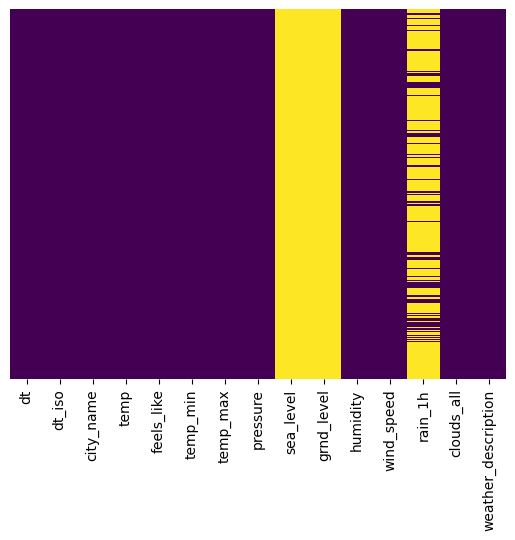

In [10]:
sns.heatmap(meteo.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Retirar colunas sea_level e grnd_level

<Axes: >

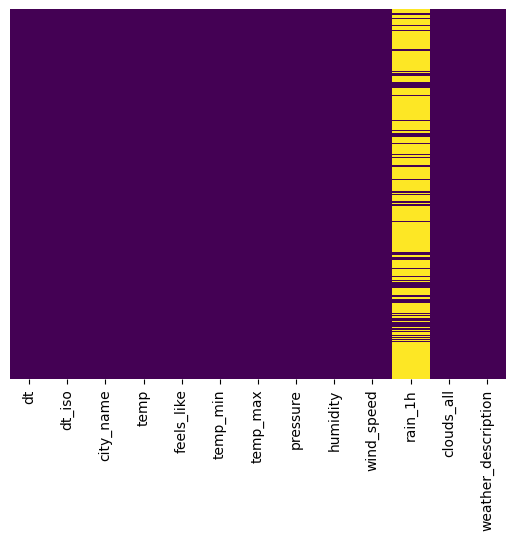

In [11]:
meteo.drop(['sea_level', 'grnd_level'], axis=1, inplace=True)
sns.heatmap(meteo.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Tratamento da coluna rain_1h

<Axes: >

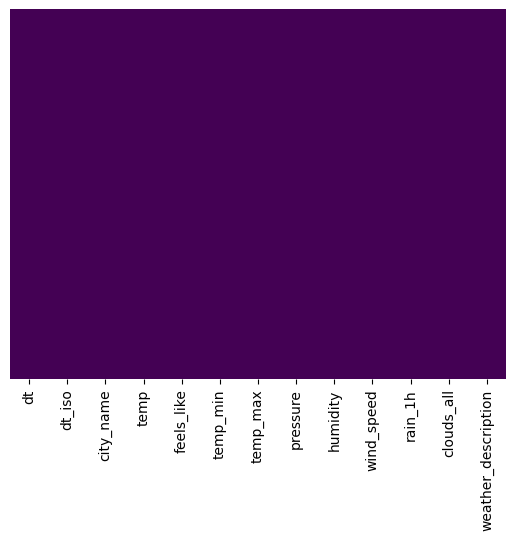

In [12]:
meteo['rain_1h'] = meteo['rain_1h'].fillna(0)
sns.heatmap(meteo.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
meteo

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00,local,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00,local,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00,local,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00,local,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00,local,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1678820400,2023-03-14 19:00:00,local,13.10,12.27,12.72,13.60,1024,69,1.87,0.00,96,overcast clouds
1748,1678824000,2023-03-14 20:00:00,local,12.30,11.83,10.72,12.88,1023,86,1.03,0.00,84,broken clouds
1749,1678827600,2023-03-14 21:00:00,local,11.77,11.30,10.26,12.88,1023,88,1.03,0.00,84,broken clouds
1750,1678831200,2023-03-14 22:00:00,local,10.68,10.13,9.15,12.32,1023,89,1.03,0.00,84,broken clouds


### Analisar os dados

Analisar os valores para a coluna temp

In [14]:
meteo['temp'].value_counts()

temp
14.59    76
15.70    61
16.82    51
12.92    48
12.98    47
         ..
27.13     1
30.62     1
31.48     1
32.64     1
16.47     1
Name: count, Length: 2611, dtype: int64

Histograma 

<Axes: >

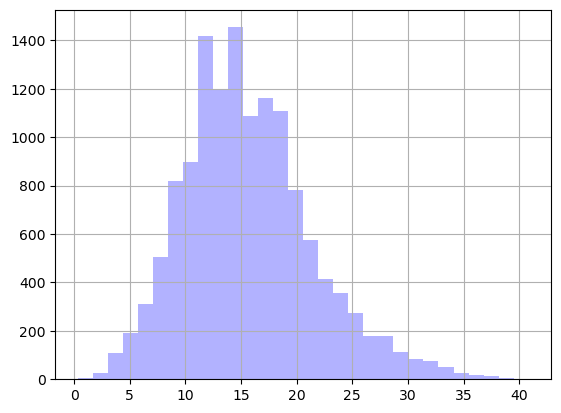

In [15]:
meteo['temp'].hist(bins=30, color='blue', alpha=0.3)

In [16]:
meteo['weather_description'].value_counts()

weather_description
sky is clear            3899
overcast clouds         2896
light rain              2083
broken clouds           1677
scattered clouds        1331
few clouds               831
moderate rain            652
heavy intensity rain      71
Name: count, dtype: int64

In [17]:
by_temp = meteo['temp'].groupby(meteo['weather_description'])
print(by_temp.count())
print()
print(by_temp.mean())

weather_description
broken clouds           1677
few clouds               831
heavy intensity rain      71
light rain              2083
moderate rain            652
overcast clouds         2896
scattered clouds        1331
sky is clear            3899
Name: temp, dtype: int64

weather_description
broken clouds           16.233298
few clouds              16.101396
heavy intensity rain    16.186056
light rain              14.843145
moderate rain           14.975138
overcast clouds         15.263080
scattered clouds        16.590346
sky is clear            15.802229
Name: temp, dtype: float64


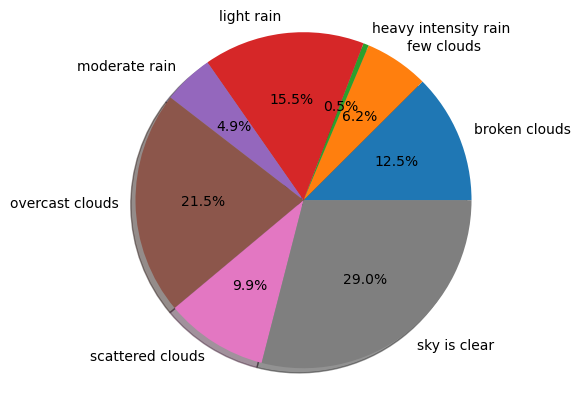

In [18]:
labels = meteo['weather_description'].astype('category').cat.categories.tolist()
counts = meteo['weather_description'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Método de Pearson

<Axes: >

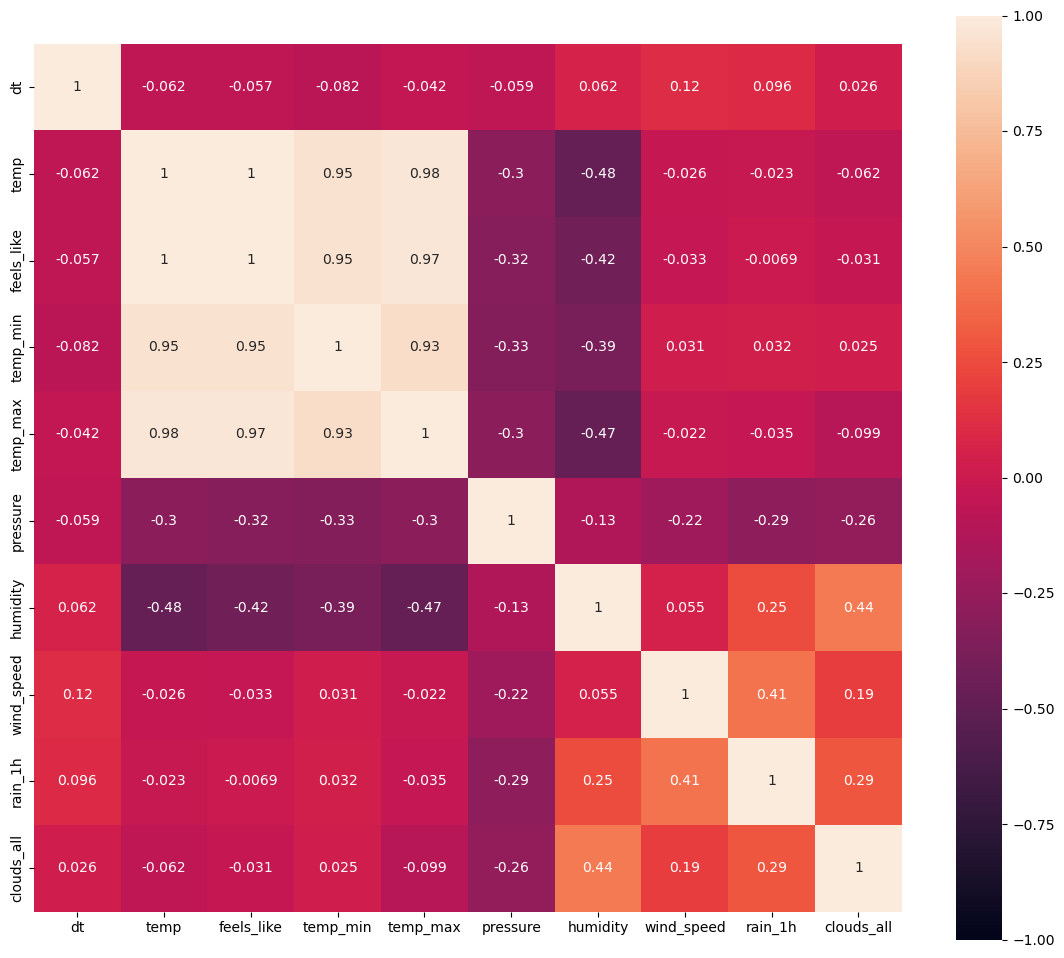

In [19]:
# Define data_non_categorical
data_non_categorical = meteo.select_dtypes(exclude=['object'])

# Pearson Method
corr_matrix = data_non_categorical.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Método de Spearman

<Axes: >

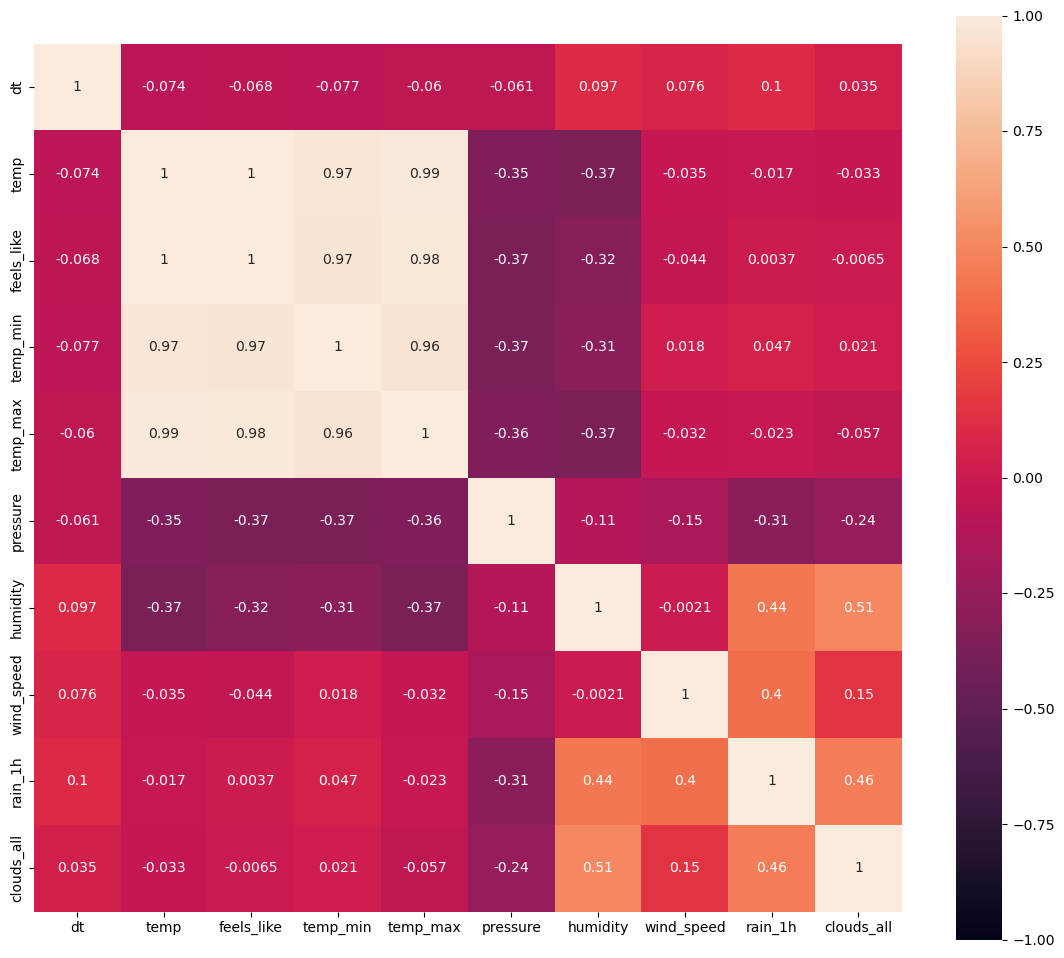

In [20]:
# Spearman method
corr_matrix = data_non_categorical.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Método de Kendall

<Axes: >

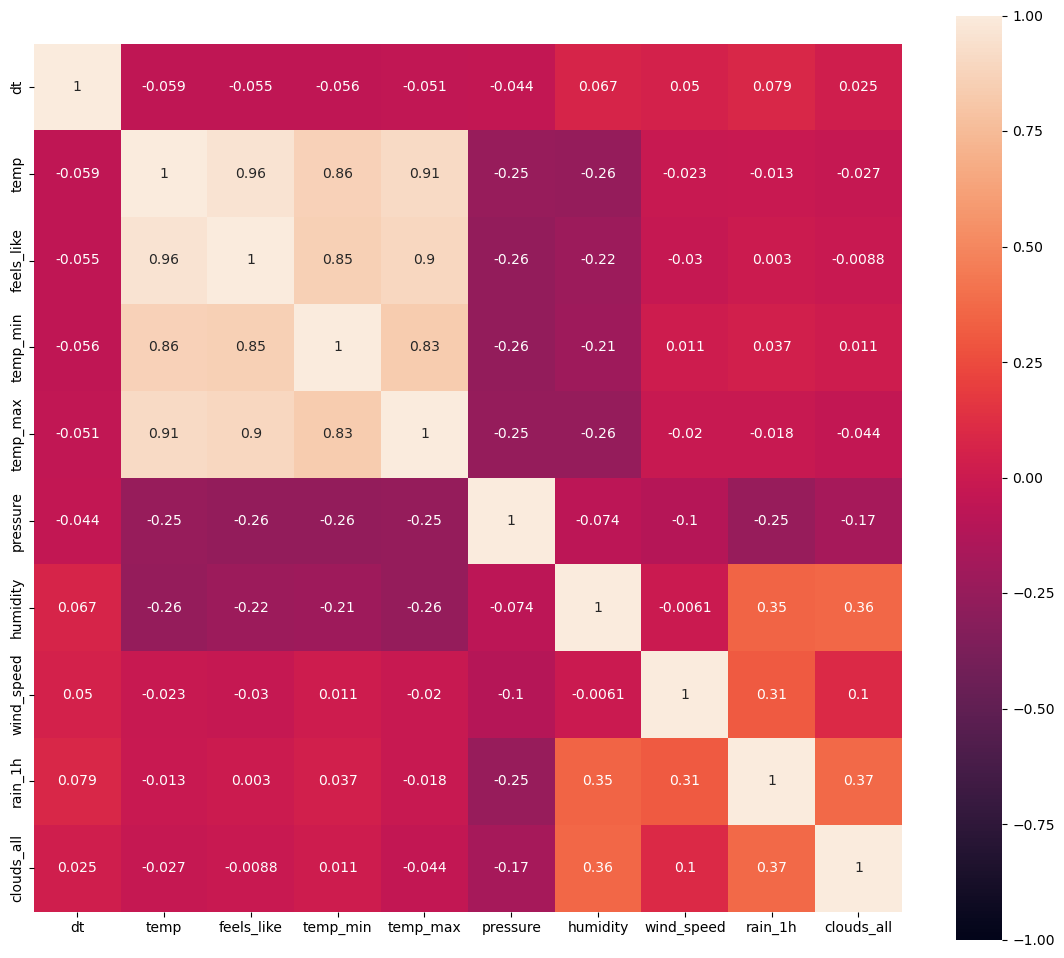

In [21]:
# Kendall method
corr_matrix = data_non_categorical.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Análise multivariada

Analisar as relações entre múltiplas variáveis

/home/jpgoncalves13/miniconda3/envs/envNAME/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

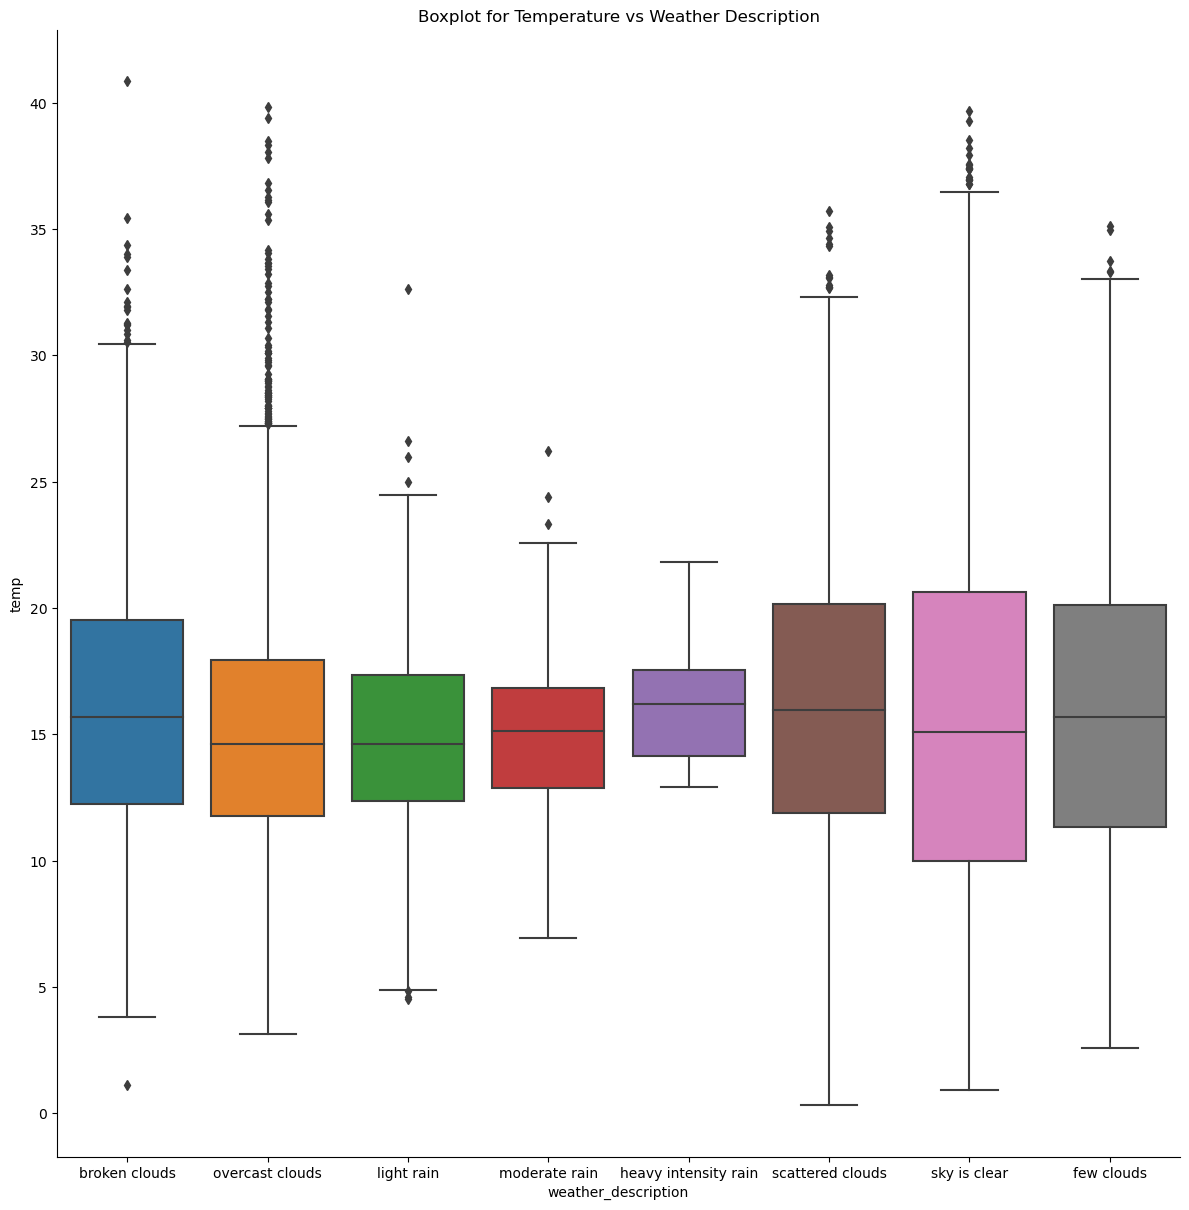

In [37]:
fig = plt.figure(figsize=(16, 8))
sns.catplot(y='temp', x='weather_description', data=meteo, kind='box', aspect=1, orient='v', height=12)
plt.title('Boxplot for Temperature vs Weather Description')
plt.show()

Verificar outliers

In [42]:
q3 = meteo.groupby('weather_description')['temp'].quantile(0.75).sort_values(ascending=False)
q1 = meteo.groupby('weather_description')['temp'].quantile(0.25).sort_values(ascending=False)


meteo['temp_q1'] = meteo.groupby('weather_description')['temp'].transform('quantile', 0.25)
meteo['temp_q3'] = meteo.groupby('weather_description')['temp'].transform('quantile', 0.75)
meteo['temp_iqr'] = meteo['temp_q3'] - meteo['temp_q1']


#Retirar outliers
data = meteo[
    (meteo['temp'] <= meteo['temp_q3'] + 1.5 * meteo['temp_iqr']) &
    (meteo['temp'] >= meteo['temp_q1'] - 1.5 * meteo['temp_iqr'])
].drop(['temp_q1', 'temp_q3', 'temp_iqr'], axis=1)

data

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00,local,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00,local,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00,local,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00,local,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00,local,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1678820400,2023-03-14 19:00:00,local,13.10,12.27,12.72,13.60,1024,69,1.87,0.00,96,overcast clouds
1748,1678824000,2023-03-14 20:00:00,local,12.30,11.83,10.72,12.88,1023,86,1.03,0.00,84,broken clouds
1749,1678827600,2023-03-14 21:00:00,local,11.77,11.30,10.26,12.88,1023,88,1.03,0.00,84,broken clouds
1750,1678831200,2023-03-14 22:00:00,local,10.68,10.13,9.15,12.32,1023,89,1.03,0.00,84,broken clouds
